<a href="https://colab.research.google.com/github/drchubbington/emotions-nlp/blob/master/emotions_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.python import keras
import tensorflow.keras.utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

import nltk
nltk.download("stopwords")
nltk.download("PorterStemmer")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
porter = PorterStemmer()

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading PorterStemmer: Package 'PorterStemmer' not
[nltk_data]     found in index
/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
'''
/Users/owenmatheson/Downloads/archive/val.txt
/Users/owenmatheson/Downloads/archive/train.txt
/Users/owenmatheson/Downloads/archive/test.txt

train_txt = open("/content/train.txt", "r")
test_txt = open("/content/test.txt", "r")
val_txt = open("/content/val.txt", "r")
'''


'\n/Users/owenmatheson/Downloads/archive/val.txt\n/Users/owenmatheson/Downloads/archive/train.txt\n/Users/owenmatheson/Downloads/archive/test.txt\n\ntrain_txt = open("/content/train.txt", "r")\ntest_txt = open("/content/test.txt", "r")\nval_txt = open("/content/val.txt", "r")\n'

In [8]:
def open_parse(path):
  data = open(path, "r")
  lines = data.readlines()
  features = []
  labels = []
  for line in lines:
    divider = line.rfind(";")
    features.append(line[:divider])
    labels.append(line[divider+1:-1])

  return features, labels

In [9]:
X_train, Y_train = open_parse("/content/train.txt")
X_test, Y_test = open_parse("/content/test.txt")
X_val, Y_val = open_parse("/content/val.txt")
zipped = list(zip(X_train, Y_train))
for i in range(5):
  print(zipped[i])


X_temp = []
for X in X_train:
  X_temp.append(X.split())
X_train = X_temp

X_temp = []
for X in X_test:
  X_temp.append(X.split())
X_test = X_temp

X_temp = []
for X in X_val:
  X_temp.append(X.split())
X_val = X_temp

print()
for i in range(5):
  print(X_train[i])


X_train, Y_train = np.array(X_train, dtype="object"), np.array(Y_train, dtype="object")

X_test, Y_test = np.array(X_test, dtype="object"), np.array(Y_test, dtype="object")

X_val, Y_val = np.array(X_val, dtype="object"), np.array(Y_val, dtype="object")

print()
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

emotions = []
for Y in Y_train:
  if not Y in emotions:
    emotions.append(Y)

print()
print("Y categories: " + str(emotions))

('i didnt feel humiliated', 'sadness')
('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'sadness')
('im grabbing a minute to post i feel greedy wrong', 'anger')
('i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'love')
('i am feeling grouchy', 'anger')

['i', 'didnt', 'feel', 'humiliated']
['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']
['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']
['i', 'am', 'ever', 'feeling', 'nostalgic', 'about', 'the', 'fireplace', 'i', 'will', 'know', 'that', 'it', 'is', 'still', 'on', 'the', 'property']
['i', 'am', 'feeling', 'grouchy']

(16000,)
(2000,)
(2000,)

Y categories: ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


In [10]:
#prepare/simplify text

print(X_train[0])
print(X_test[0])
print(X_val[0])

#remove useless "stop" words
stop_words = stopwords.words('english')
for i in range(len(stop_words)):
  stop_words[i] = stop_words[i].replace("'", "")
print(stop_words)
for sen in X_train:
  i=0
  while i<len(sen):
    if sen[i] in stop_words:
      sen.pop(i)
      i-=1
    i+=1
print(X_train[1])

for sen in X_test:
  i=0
  while i<len(sen):
    if sen[i] in stop_words:
      sen.pop(i)
      i-=1
    i+=1

for sen in X_val:
  i=0
  while i<len(sen):
    if sen[i] in stop_words:
      sen.pop(i)
      i-=1
    i+=1

#remove stems (e.g.: "ing," "ed," "s")
for sen in X_train:
  for i in range(len(sen)):
    sen[i] = porter.stem(sen[i])
print(X_train[0])

for sen in X_test:
  for i in range(len(sen)):
    sen[i] = porter.stem(sen[i])
print(X_test[0])

for sen in X_val:
  for i in range(len(sen)):
    sen[i] = porter.stem(sen[i])
print(X_val[0])

['i', 'didnt', 'feel', 'humiliated']
['im', 'feeling', 'rather', 'rotten', 'so', 'im', 'not', 'very', 'ambitious', 'right', 'now']
['im', 'feeling', 'quite', 'sad', 'and', 'sorry', 'for', 'myself', 'but', 'ill', 'snap', 'out', 'of', 'it', 'soon']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off

In [11]:
#tokenization and padding
print(X_train[0])
print(X_test[0])
print(X_val[0])

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
sentences = X_train
X_train = tokenizer.texts_to_sequences(sentences)

#tokenize the test and val datasets?
sentences = X_test
X_test = tokenizer.texts_to_sequences(sentences)

sentences = X_val
X_val = tokenizer.texts_to_sequences(sentences)

#vocab on training data
vocab_size = 15212

#pad
maxlen = 80
for sentence in X_train:
  if len(sentence)>maxlen:
    sentence.pop()

for sentence in X_test:
  while(len(sentence)>maxlen):
    sentence.pop()

for sentence in X_val:
  while(len(sentence)>maxlen):
    sentence.pop()

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

print(X_train[0])
print(X_test[0])
print(X_val[0])
print("maxlen: "+str(maxlen))

['feel', 'humili']
['im', 'feel', 'rather', 'rotten', 'im', 'ambiti', 'right']
['im', 'feel', 'quit', 'sad', 'sorri', 'ill', 'snap', 'soon']
[  1 571   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0]
[   3    1  118  619    3 4161   38    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
[   3    1   67  130  265  115 2420  452    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

In [12]:
print("Y_train:")
print(Y_train[:5])

for i in range(len(Y_train)):
  try:
    Y_train[i] = int(emotions.index(Y_train[i]))
  except:
    print("Error processing " + Y_train[i])


print(Y_train[:5])

print("\nY_test:")
print(Y_test[:5])

for i in range(len(Y_test)):
  try:
    Y_test[i] = int(emotions.index(Y_test[i]))
  except:
    print("Error processing " + Y_test[i])


print(Y_test[:5])

print("\nY_val:")
print(Y_val[:5])

for i in range(len(Y_val)):
  try:
    Y_val[i] = int(emotions.index(Y_val[i]))
  except:
    print("Error processing " + Y_val[i])


print(Y_val[:5])

Y_train:
['sadness' 'sadness' 'anger' 'love' 'anger']
[0 0 1 2 1]

Y_test:
['sadness' 'sadness' 'sadness' 'joy' 'sadness']
[0 0 0 5 0]

Y_val:
['sadness' 'sadness' 'love' 'anger' 'joy']
[0 0 2 1 5]


In [13]:
print("Array type")
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))
print(type(X_val))
print(type(Y_val))
print("Ind 0 type")
print(type(X_train[0]))
print(type(Y_train[0]))
print(type(X_test[0]))
print(type(Y_test[0]))
print(type(X_val[0]))
print(type(Y_val[0]))
Y_train, Y_test, Y_val = np.vstack(Y_train), np.vstack(Y_test), np.vstack(Y_val)
print("Array shape")
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)
print("X_val: ", X_val.shape)
print("Y_val: ", Y_val.shape)

X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_val).astype(np.float32)

X_val = np.asarray(X_val).astype(np.float32)
Y_val = np.asarray(Y_val).astype(np.float32)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_val = to_categorical(Y_val)
print(Y_train[:10])

Array type
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Ind 0 type
<class 'numpy.ndarray'>
<class 'int'>
<class 'numpy.ndarray'>
<class 'int'>
<class 'numpy.ndarray'>
<class 'int'>
Array shape
X_train:  (16000, 80)
Y_train:  (16000, 1)
X_test:  (2000, 80)
Y_test:  (2000, 1)
X_val:  (2000, 80)
Y_val:  (2000, 1)
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


In [14]:
batch_size = 32

#copied from online
model=Sequential()
model.add(layers.Embedding(input_dim = vocab_size, output_dim = 64,input_length=maxlen))
model.add(layers.Dropout(0.6))
model.add(layers.Bidirectional(layers.LSTM(maxlen,return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(160)))
model.add(layers.Dense(6,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.build()
model.summary()

for layer in model.layers:
  print(layer.name+"          ", "Input shape: ", layer.input_shape)
  print(layer.name+"          ", "Output shape: ", layer.output_shape)

[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_val, Y_val))

loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            973568    
                                                                 
 dropout (Dropout)           (None, 80, 64)            0         
                                                                 
 bidirectional (Bidirection  (None, 80, 160)           92800     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 320)               410880    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 1926      
                                                                 
Total params: 1479174 (5.64 MB)
Trainable params: 147917

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


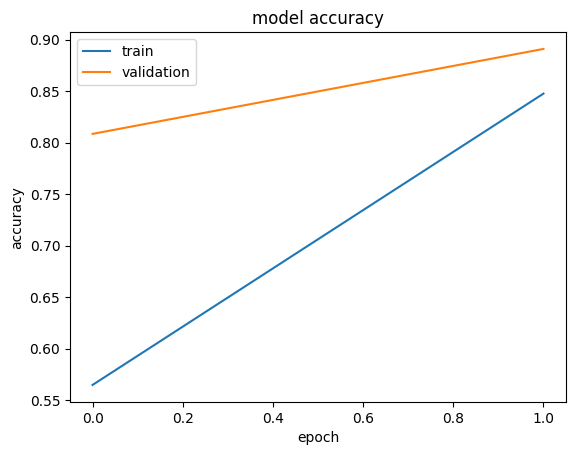

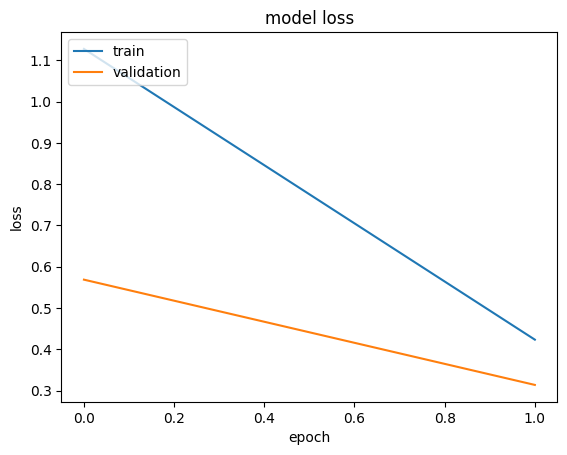

In [15]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [16]:
Y_ = model.predict(X_train)
print(Y_.shape)
evaluation = list(zip(Y_train, Y_))
print(evaluation[:10])
correct = 0
incorrect = 1
for i in evaluation:
  if list(i[0]).index(max(list(i[0])))==list(i[1]).index(max(list(i[1]))):
    correct += 1
  else:
    incorrect += 1
print("correct answers:", correct)
print("incorrect answers:", incorrect)
print("accuracy:", correct/(correct+incorrect))

500/500 [==============================] - 4s 6ms/step
(16000, 6)
[(array([1., 0., 0., 0., 0., 0.], dtype=float32), array([9.9847442e-01, 2.3225298e-04, 1.6684803e-04, 3.0460082e-05,
       1.9787805e-04, 8.9810044e-04], dtype=float32)), (array([1., 0., 0., 0., 0., 0.], dtype=float32), array([9.9305010e-01, 1.8490547e-03, 9.4923237e-04, 3.5222934e-04,
       1.8671344e-03, 1.9321764e-03], dtype=float32)), (array([0., 1., 0., 0., 0., 0.], dtype=float32), array([1.7774861e-03, 9.7692686e-01, 1.0805588e-03, 3.4762296e-04,
       1.8210936e-02, 1.6565875e-03], dtype=float32)), (array([0., 0., 1., 0., 0., 0.], dtype=float32), array([1.1141346e-04, 3.8443200e-04, 9.1722471e-01, 3.5526033e-03,
       2.8837312e-04, 7.8438371e-02], dtype=float32)), (array([0., 1., 0., 0., 0., 0.], dtype=float32), array([3.0454723e-03, 9.8388404e-01, 3.6500421e-04, 2.9635645e-04,
       1.1469584e-02, 9.3948917e-04], dtype=float32)), (array([1., 0., 0., 0., 0., 0.], dtype=float32), array([9.7032297e-01, 8.17378

In [17]:
Y_ = model.predict(X_test)
print(Y_.shape)
evaluation = list(zip(Y_test, Y_))
print(evaluation[:10])
correct = 0
incorrect = 1
for i in evaluation:
  if list(i[0]).index(max(list(i[0])))==list(i[1]).index(max(list(i[1]))):
    correct += 1
    print("Correct")
  else:
    incorrect += 1
    print("Incorrect")
print("correct answers:", correct)
print("incorrect answers:", incorrect)
print("accuracy:", correct/(correct+incorrect))

63/63 [==============================] - 2s 10ms/step
(2000, 6)
[(array([1., 0., 0., 0., 0., 0.], dtype=float32), array([9.9564362e-01, 2.8090717e-04, 3.9686443e-04, 8.6112363e-05,
       3.1461846e-04, 3.2778338e-03], dtype=float32)), (array([1., 0., 0., 0., 0., 0.], dtype=float32), array([9.9537897e-01, 3.3820377e-04, 4.9038389e-04, 1.4274224e-04,
       4.1978914e-04, 3.2298907e-03], dtype=float32)), (array([0., 0., 1., 0., 0., 0.], dtype=float32), array([9.8861885e-01, 9.1360166e-04, 1.3511985e-03, 4.1266368e-04,
       9.0870861e-04, 7.7948994e-03], dtype=float32)), (array([0., 1., 0., 0., 0., 0.], dtype=float32), array([2.8673438e-03, 1.7516857e-03, 5.3871837e-03, 1.8405690e-04,
       3.7366961e-04, 9.8943603e-01], dtype=float32)), (array([0., 0., 0., 0., 0., 1.], dtype=float32), array([9.9909079e-01, 1.2129891e-04, 1.3539694e-04, 3.2095249e-05,
       1.8653779e-04, 4.3395872e-04], dtype=float32)), (array([0., 0., 0., 0., 0., 1.], dtype=float32), array([6.4360723e-03, 1.3330041

In [18]:
InteractiveSession.close(session)